In [1]:
import os

fold_path = '/upstage-cv-classification-cv2/data/test'
hard_test_fold_path = '/upstage-cv-classification-cv2/data/hard_test/#Uace0#Ub09c#Ub3c4#Ud14c#Uc2a4#Ud2b8'

file_list = os.listdir(fold_path)
hard_file_list = os.listdir(hard_test_fold_path)

file_list = [file for file in file_list if file not in hard_file_list]


In [2]:
import random

random.seed(42)

choiced_list = random.sample(file_list, 300 - len(hard_file_list))

print(len(choiced_list))
choiced_list.extend(hard_file_list)
print(len(choiced_list))

249
300


In [14]:
import pandas as pd

meta = pd.read_csv('/upstage-cv-classification-cv2/data/meta.csv')

translations = {
        'account_number': '계좌번호',
        'application_for_payment_of_pregnancy_medical_expenses': '건강보험 임신출산 진료비 지급 신청서',
        'car_dashboard': '자동차 계기판',
        'confirmation_of_admission_and_discharge': '입퇴원 확인서',
        'diagnosis': '진단서',
        'driver_lisence': '운전면허증',
        'medical_bill_receipts': '진료비영수증',
        'medical_outpatient_certificate': '통원진료 확인서',
        'national_id_card': '주민등록증',
        'passport': '여권',
        'payment_confirmation': '진료비 납입 확인서',
        'pharmaceutical_receipt': '약제비 영수증',
        'prescription': '처방전',
        'resume': '이력서',
        'statement_of_opinion': '소견서',
        'vehicle_registration_certificate': '자동차 등록증',
        'vehicle_registration_plate': '자동차 번호판'
}

meta['kr_class_name'] = meta['class_name'].map(lambda x : translations[x])
meta

,target,class_name,kr_class_name
0,0,account_number,계좌번호
1,1,application_for_payment_of_pregnancy_medical_e...,건강보험 임신출산 진료비 지급 신청서
2,2,car_dashboard,자동차 계기판
3,3,confirmation_of_admission_and_discharge,입퇴원 확인서
4,4,diagnosis,진단서
5,5,driver_lisence,운전면허증
6,6,medical_bill_receipts,진료비영수증
7,7,medical_outpatient_certificate,통원진료 확인서
8,8,national_id_card,주민등록증
9,9,passport,여권


In [40]:
best_model_prediction = pd.read_csv('/upstage-cv-classification-cv2/data/output.csv')
best_model_prediction['pred'] = best_model_prediction['target']
best_model_prediction = best_model_prediction.drop(columns=['target'], axis=1)
best_model_prediction

,ID,pred
0,0008fdb22ddce0ce.jpg,2
1,00091bffdffd83de.jpg,12
2,00396fbc1f6cc21d.jpg,5
3,00471f8038d9c4b6.jpg,4
4,00901f504008d884.jpg,2
...,...,...
3135,ffb4b6f619fb60ea.jpg,6
3136,ffb54299b1ad4159.jpg,10
3137,ffc2c91dff8cf2c0.jpg,8
3138,ffc4e330a5353a2a.jpg,0


In [43]:
df_ = df.copy()
print(len(df_))
df_ = df_.merge(best_model_prediction, on='ID', how='inner')
print(len(df_))
df_


300
300


,ID,target,pred
0,509d0d18ae93fea2.jpg,7,7
1,ddd0861c08ceb062.jpg,10,10
2,665e0d926f1742dd.jpg,12,12
3,bc9af2da15862e2c.jpg,16,16
4,529f09adc05ce037.jpg,0,0
...,...,...,...
295,70ee60fe819b7b39.jpg,0,0
296,359fab2e1b0ab5e1.jpg,0,2
297,01385f22f2490868.jpg,0,4
298,80c584882734e3df.jpg,0,10


In [6]:
from PIL import Image

images ={}

for file_name in choiced_list:
    file_path = '/upstage-cv-classification-cv2/data/test/' + file_name
    img = Image.open(file_path)

    images[file_name] = img

In [7]:
import matplotlib.pyplot as plt
import cv2

def show_img(file_name):
    img = images[file_name]
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    time.sleep(1.5)

    target = int(input())
    plt.close()
    return target

In [8]:
valid_csv = pd.read_csv('/upstage-cv-classification-cv2/data/valid.csv')
valid_csv.head(40)

,ID,target
0,valid_d919dabe9f066dfc.jpg,1
1,valid_7f23b9ae37e539ea.jpg,1
2,valid_9a36a151cf95bb29.jpg,1
3,valid_f0d11155d48758de.jpg,1
4,valid_c8816965abf6559b.jpg,1
5,valid_e61d239495689428.jpg,1
6,valid_12e8c26f252aa8df.jpg,1
7,valid_37f9414beea68229.jpg,14
8,valid_d1b668ee2329c564.jpg,14
9,valid_8db8f37ec84b4f8f.jpg,14


In [48]:
import time
start_index = 0

while start_index < 300:
    print(f"{start_index} 번째 작업중 ... ")
    file_name = df_.iloc[start_index]['ID']
    pred = df_.iloc[start_index]['pred']
    print(f"AI 예측 : {pred} - {meta.loc[pred, 'kr_class_name']}")
    
    target = show_img(file_name)

    if target == -1:
        break
    
    df_.loc[start_index, 'target'] = target
    start_index += 1
    

300 번째 작업중 ... 


IndexError: single positional indexer is out-of-bounds

AI 예측 : 1.0 - 건강보험 임신출산 진료비 지급 신청서


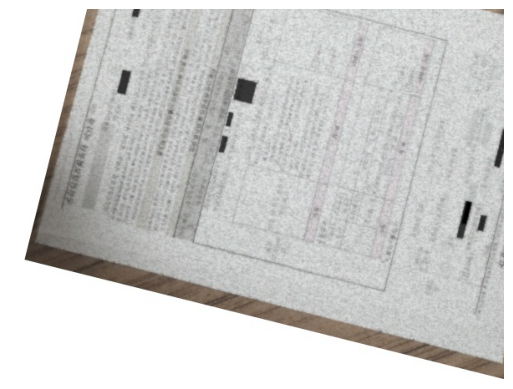

AI 예측 : 13.0 - 이력서


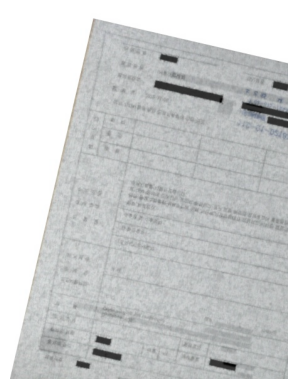

AI 예측 : 6.0 - 진료비영수증


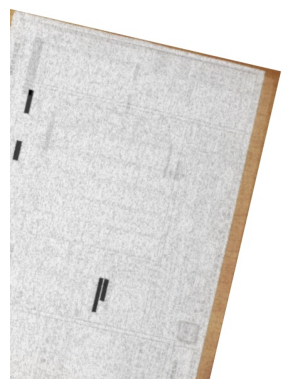

AI 예측 : 14.0 - 소견서


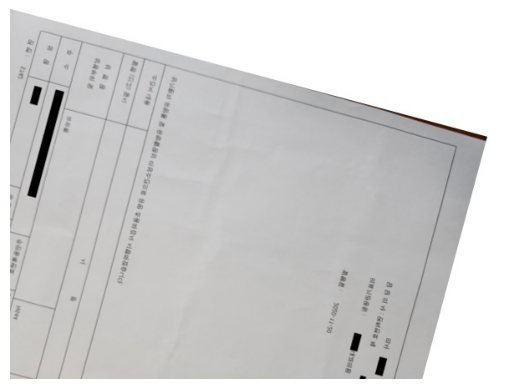

AI 예측 : 4.0 - 진단서


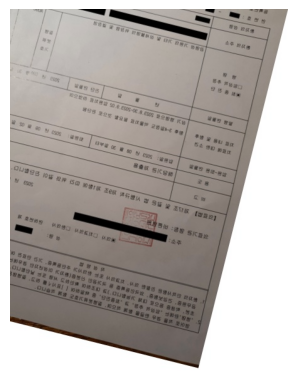

AI 예측 : 10.0 - 진료비 납입 확인서


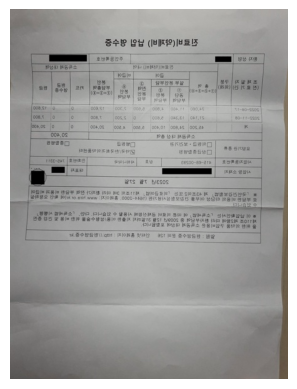

AI 예측 : 7.0 - 통원진료 확인서


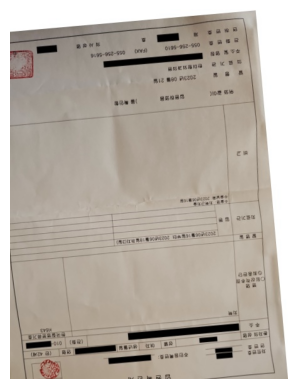

AI 예측 : 7.0 - 통원진료 확인서


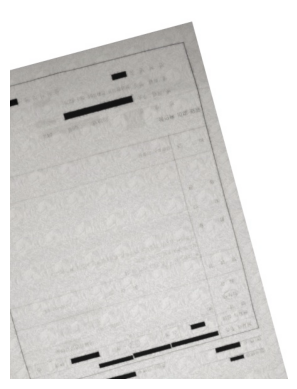

AI 예측 : 10.0 - 진료비 납입 확인서


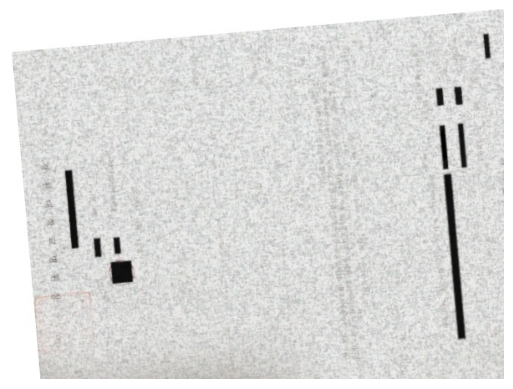

AI 예측 : 3.0 - 입퇴원 확인서


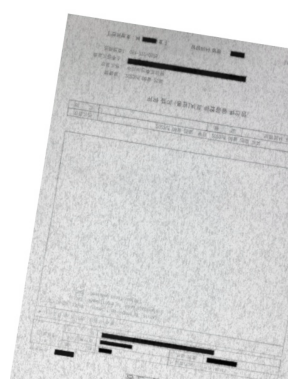

AI 예측 : 1.0 - 건강보험 임신출산 진료비 지급 신청서


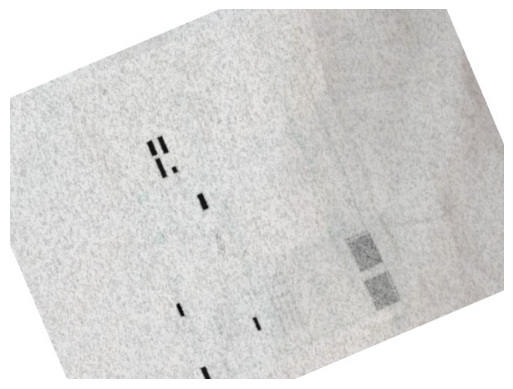

AI 예측 : 6.0 - 진료비영수증


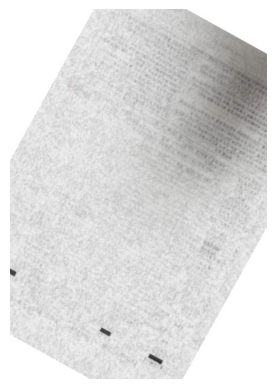

AI 예측 : 6.0 - 진료비영수증


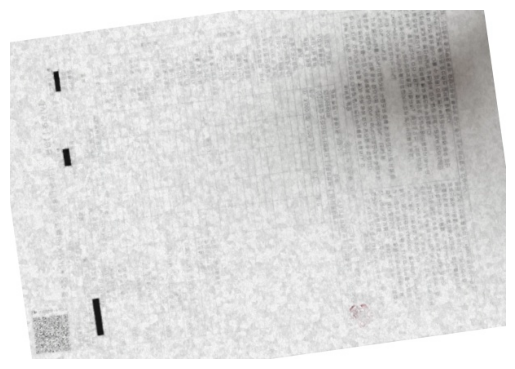

AI 예측 : 7.0 - 통원진료 확인서


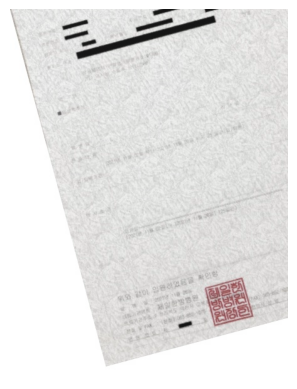

AI 예측 : 6.0 - 진료비영수증


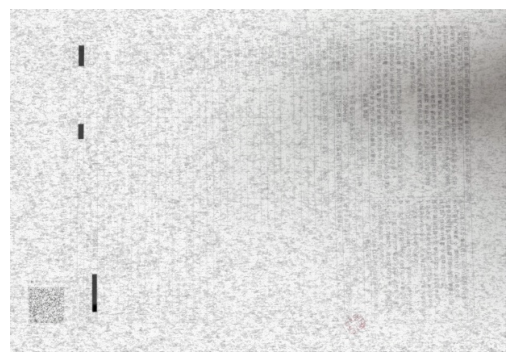

AI 예측 : 4.0 - 진단서


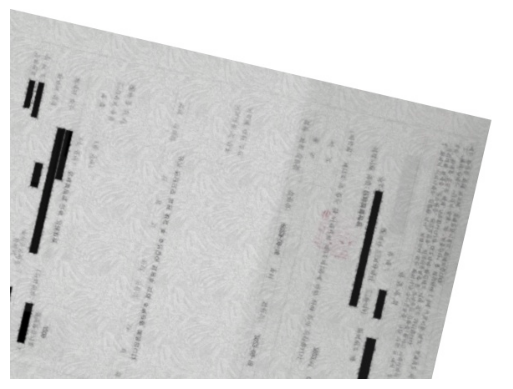

AI 예측 : 13.0 - 이력서


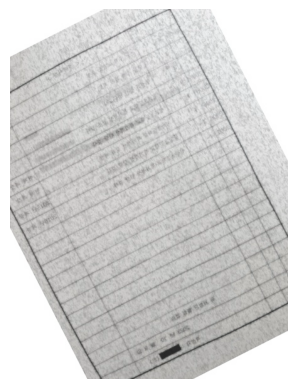

AI 예측 : 10.0 - 진료비 납입 확인서


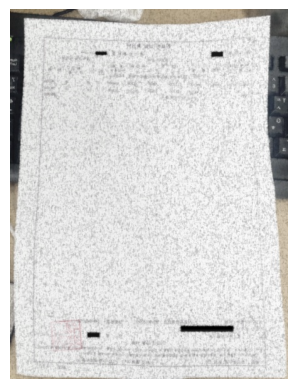

In [56]:
unknown = df_[(df_['target'] == 17) | (df_['target'] == -1)]["ID"]

for id in unknown:
    pred = df_.loc[df_['ID'] == id, 'pred'].values[0]
    print(f"AI 예측 : {pred} - {meta.loc[pred, 'kr_class_name']}")
    target = show_img(id)


    if target == -1:
        break
    
    df_.loc[start_index, 'target'] = target



In [57]:
df_

,ID,target,pred
0,509d0d18ae93fea2.jpg,7.0,7.0
1,ddd0861c08ceb062.jpg,10.0,10.0
2,665e0d926f1742dd.jpg,12.0,12.0
3,bc9af2da15862e2c.jpg,16.0,16.0
4,529f09adc05ce037.jpg,0.0,0.0
...,...,...,...
296,359fab2e1b0ab5e1.jpg,2.0,2.0
297,01385f22f2490868.jpg,4.0,4.0
298,80c584882734e3df.jpg,17.0,10.0
299,81dfc09159a18109.jpg,6.0,6.0


In [59]:
import seaborn as sns
df = df_[df_['target'] != 17]
df['target'].value_counts() 

target
6.0     29
12.0    22
7.0     20
0.0     20
2.0     20
10.0    20
15.0    19
13.0    17
4.0     17
5.0     16
8.0     16
16.0    16
11.0    13
3.0     12
9.0     12
14.0     7
1.0      6
Name: count, dtype: int64

In [80]:
valid_df = pd.DataFrame(columns=['ID', 'target'])

In [84]:
train_df = pd.read_csv('/upstage-cv-classification-cv2/data/train.csv')
target_1_df = train_df[train_df['target'] == 14]
sample_df = target_1_df.sample(n=7, random_state=42)

sample_df

,ID,target
334,37f9414beea68229.jpg,14
1306,d1b668ee2329c564.jpg,14
904,8db8f37ec84b4f8f.jpg,14
1484,ef2bf2a6aa6f525d.jpg,14
501,5074e85e2a75a1fe.jpg,14
1511,f3d4cabc480bfc06.jpg,14
808,7c6fb8ca1b30ee46.jpg,14


In [85]:
import cv2
import numpy as np
import os
import random

def random_augment(image):
    # 회전
    if random.choice([True, False]):
        angle = random.uniform(-30, 30)
        h, w = image.shape[:2]
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
        image = cv2.warpAffine(image, M, (w, h))
    
    # 플립
    if random.choice([True, False]):
        flip_mode = random.choice([-1, 0, 1])
        image = cv2.flip(image, flip_mode)
    
    # 가우시안 필터
    if random.choice([True, False]):
        ksize = random.choice([9, 11, 13])  # 더 큰 커널 크기 선택
        sigma = random.uniform(5, 10)  # 더 큰 표준 편차 선택
        image = cv2.GaussianBlur(image, (ksize, ksize), sigma)
    
    # 크롭
    if random.choice([True, False]):
        h, w = image.shape[:2]
        crop_percent = random.uniform(0.8, 0.95)
        crop_w = int(w * crop_percent)
        crop_h = int(h * crop_percent)
        start_x = random.randint(0, w - crop_w)
        start_y = random.randint(0, h - crop_h)
        image = image[start_y:start_y+crop_h, start_x:start_x+crop_w]
    
    return image

In [86]:
temp_list = []

for id in sample_df['ID']:
    file_path = os.path.join('/upstage-cv-classification-cv2/data/train', str(id)) 
    
    # 이미지 읽기
    image = cv2.imread(file_path)
    
    if image is None:
        print(f"Unable to read image: {file_path}")
        continue
    
    # 랜덤 증강 적용
    augmented_image = random_augment(image)
    
    # 새 이미지 저장
    new_file_path = os.path.join('/upstage-cv-classification-cv2/data/valid', f"valid_{id}")
    
    temp_list.append({"ID" : f"valid_{id}", 'target' : 14})
    cv2.imwrite(new_file_path, augmented_image)
    
    print(f"Augmented image saved: {new_file_path}")

temp_df = pd.DataFrame(temp_list)
valid_df = pd.concat([valid_df, temp_df], axis=0)
valid_df
    

Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_37f9414beea68229.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_d1b668ee2329c564.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_8db8f37ec84b4f8f.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_ef2bf2a6aa6f525d.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_5074e85e2a75a1fe.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_f3d4cabc480bfc06.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_7c6fb8ca1b30ee46.jpg


,ID,target
0,valid_d919dabe9f066dfc.jpg,1
1,valid_7f23b9ae37e539ea.jpg,1
2,valid_9a36a151cf95bb29.jpg,1
3,valid_f0d11155d48758de.jpg,1
4,valid_c8816965abf6559b.jpg,1
5,valid_e61d239495689428.jpg,1
6,valid_12e8c26f252aa8df.jpg,1
0,valid_37f9414beea68229.jpg,14
1,valid_d1b668ee2329c564.jpg,14
2,valid_8db8f37ec84b4f8f.jpg,14


In [88]:
df

,ID,target,pred
0,509d0d18ae93fea2.jpg,7.0,7.0
1,ddd0861c08ceb062.jpg,10.0,10.0
2,665e0d926f1742dd.jpg,12.0,12.0
3,bc9af2da15862e2c.jpg,16.0,16.0
4,529f09adc05ce037.jpg,0.0,0.0
...,...,...,...
294,1421fb31607c5123.jpg,13.0,13.0
295,70ee60fe819b7b39.jpg,0.0,0.0
296,359fab2e1b0ab5e1.jpg,2.0,2.0
297,01385f22f2490868.jpg,4.0,4.0


In [89]:
temp_list = []
for idx, value in df.iterrows():
    id, target = value['ID'], value['target']

    file_path = os.path.join('/upstage-cv-classification-cv2/data/test', str(id)) 
    image = cv2.imread(file_path)
    
    if image is None:
        print(f"Unable to read image: {file_path}")
        continue

    # 새 이미지 저장
    new_file_path = os.path.join('/upstage-cv-classification-cv2/data/valid', f"valid_{id}")
    
    temp_list.append({"ID" : f"valid_{id}", 'target' : target})
    cv2.imwrite(new_file_path, augmented_image)
    
    print(f"Augmented image saved: {new_file_path}")

temp_df = pd.DataFrame(temp_list)
valid_df = pd.concat([valid_df, temp_df], axis=0)
valid_df

Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_509d0d18ae93fea2.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_ddd0861c08ceb062.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_665e0d926f1742dd.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_bc9af2da15862e2c.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_529f09adc05ce037.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_4c7a2c87c730c0ed.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_d99c091221600c38.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_ba3de57a68d9cc14.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_3ed6f89260b7300f.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_56a8a6edde03bb05.jpg
Augmented image saved: /upstage-cv-classification-cv2/data/valid/valid_43b602fd2

,ID,target
0,valid_d919dabe9f066dfc.jpg,1
1,valid_7f23b9ae37e539ea.jpg,1
2,valid_9a36a151cf95bb29.jpg,1
3,valid_f0d11155d48758de.jpg,1
4,valid_c8816965abf6559b.jpg,1
...,...,...
277,valid_1421fb31607c5123.jpg,13.0
278,valid_70ee60fe819b7b39.jpg,0.0
279,valid_359fab2e1b0ab5e1.jpg,2.0
280,valid_01385f22f2490868.jpg,4.0


In [13]:
valid_csv.head(30)

,ID,target
0,valid_d919dabe9f066dfc.jpg,1
1,valid_7f23b9ae37e539ea.jpg,1
2,valid_9a36a151cf95bb29.jpg,1
3,valid_f0d11155d48758de.jpg,1
4,valid_c8816965abf6559b.jpg,1
5,valid_e61d239495689428.jpg,1
6,valid_12e8c26f252aa8df.jpg,1
7,valid_37f9414beea68229.jpg,14
8,valid_d1b668ee2329c564.jpg,14
9,valid_8db8f37ec84b4f8f.jpg,14


In [12]:
import os
import shutil
import pandas as pd
import re

# valid_csv 파일을 읽어옵니다.
valid_csv = pd.read_csv('/upstage-cv-classification-cv2/data/valid.csv')

# valid_path를 설정합니다.
valid_path = '/upstage-cv-classification-cv2/data/valid/'

# 디렉토리가 존재하지 않으면 생성합니다.
if not os.path.exists(valid_path):
    os.makedirs(valid_path)

# 파일을 복사하고 이름을 변경하는 함수
def copy_and_rename_file(src_path, dest_path, new_name):
    if os.path.exists(src_path):
        shutil.copy(src_path, os.path.join(dest_path, new_name))
        print(f"Copied: {src_path} -> {os.path.join(dest_path, new_name)}")
    else:
        print(f"File not found: {src_path}")

# 파일 복사 및 이름 변경 작업
for id, target in valid_csv.itertuples(index=False):
    image_name = re.sub('valid_', '', id)
    image_path = os.path.join('/upstage-cv-classification-cv2/data/test/', image_name)
    train_path = os.path.join('/upstage-cv-classification-cv2/data/train/', image_name)
    
    new_image_name = f"valid_{image_name}"
    
    # image_path에 파일이 있는지 확인하고 복사
    if os.path.exists(image_path):
        copy_and_rename_file(image_path, valid_path, new_image_name)
    # image_path에 파일이 없으면 train_path에서 파일을 찾아서 복사
    elif os.path.exists(train_path):
        copy_and_rename_file(train_path, valid_path, new_image_name)
    else:
        print(f"File not found in both paths: {image_name}")


Copied: /upstage-cv-classification-cv2/data/train/d919dabe9f066dfc.jpg -> /upstage-cv-classification-cv2/data/valid/valid_d919dabe9f066dfc.jpg
Copied: /upstage-cv-classification-cv2/data/train/7f23b9ae37e539ea.jpg -> /upstage-cv-classification-cv2/data/valid/valid_7f23b9ae37e539ea.jpg
Copied: /upstage-cv-classification-cv2/data/train/9a36a151cf95bb29.jpg -> /upstage-cv-classification-cv2/data/valid/valid_9a36a151cf95bb29.jpg
Copied: /upstage-cv-classification-cv2/data/train/f0d11155d48758de.jpg -> /upstage-cv-classification-cv2/data/valid/valid_f0d11155d48758de.jpg
Copied: /upstage-cv-classification-cv2/data/train/c8816965abf6559b.jpg -> /upstage-cv-classification-cv2/data/valid/valid_c8816965abf6559b.jpg
Copied: /upstage-cv-classification-cv2/data/train/e61d239495689428.jpg -> /upstage-cv-classification-cv2/data/valid/valid_e61d239495689428.jpg
Copied: /upstage-cv-classification-cv2/data/train/12e8c26f252aa8df.jpg -> /upstage-cv-classification-cv2/data/valid/valid_12e8c26f252aa8df.jpg

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_img(file_name):
    img = images[file_name]
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    time.sleep(1.5)

In [16]:
for id, target in valid_csv.itertuples():
    image_path = '/upstage-cv-classification-cv2/data/valid' + id
    KR_LABEL = meta.loc[meta['target'] == target, 'kr_class_name']
    print(f"{target} - {KR_LABEL}")

ValueError: too many values to unpack (expected 2)